# CH 13 - Metals and Complex Index of Refraction

In [13]:
import numpy as np
from numpy import sin, cos, tan, e, pi, sqrt, sinh, cosh
import math
import matplotlib.pyplot as plt

## Reflectivity of Metal Films
- **Example 13.1**: The reflectance curce of aluminum as a function of wavelength.


In [3]:
# complex index of refraction for aluminum

IOR = np.array([
[300, 0.2868, 3.689375400],
[400, 0.5062, 4.938125500],
[500, 0.789,  6.15600],
[600, 1.22,   7.31700],
[700, 1.91,   8.39800],
[800, 2.74,   8.31900],
[900, 1.86,   8.44],
])

In [6]:
# calculate reflectivity

w = 50  # thickness of Al layer

nA = 1.0  # IOR air
nS = 1.5  # IOR BK7

n = IOR[:,1] - 1j*IOR[:,2]
l = IOR[:,0]
k = 2*pi*n/l

A = cos(k*w)
B = 1j * sin(k*w) / n
C = 1j * n * sin(k*w)
D = cos(k*w)

beta  = A + B * nS
gamma = C + D * nS

r = (nA * beta - gamma) / (nA * beta + gamma)
R = r * np.conj(r)

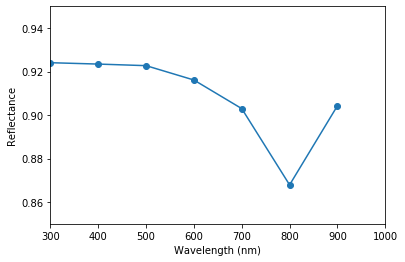

In [12]:
plt.plot(l, R, '-o');
plt.axis([300, 1000, 0.85, 0.95]);
plt.xlabel('Wavelength (nm)');
plt.ylabel('Reflectance');

## Impedance Matching
- **Example 13.2**: Calculate the maximum potential transmittance.

In [71]:
def getPsiMax(n, k, t, l):
    
    # calculate the impedance of the absorbing film
    alpha = 2*pi*n*t/l
    beta = 2*pi*k*t/l
    
    # calculations for psiMax and impedance
    P1 = sin(alpha)**2 * cosh(beta)**2 + cos(alpha)**2 * sinh(beta)**2
    P2 = cos(alpha)**2 * cosh(beta)**2 + sin(alpha)**2 * sinh(beta)**2
    P3 = n*sinh(beta)*cosh(beta) + k*cos(alpha)*sin(alpha)
    P4 = n*sinh(beta)*cosh(beta) - k*cos(alpha)*sin(alpha)
    P5 = n**2 + k**2
    P6 = n**2 - k**2
    
    # impedance
    X = sqrt(P5*P3/P4 - n**2 * k**2 * P1**2 / P4**2)
    Z = n*k*P1/P4
    Y = X + 1j*Z   # impedance of film
    
    # calculate maximum potential transmittance
    psiMax = (
        (P6 - 2*n*k*Z / X) / P5*P1
        + P2
        + P3/X
        + (X**2 + Z**2) / X / P5*P4
    )**-1
    
    print('Impedance = {} + {}i'.format(X, Z))
    print('PsiMax = {}'.format(psiMax*100))
    return X+Z*1j, psiMax*100
    
getPsiMax(0.055, 3.32, 45e-9, 550e-9)

Impedance = 1.156676651212135 + 4.0107495551526755i
PsiMax = 93.44583510429258


((1.156676651212135+4.0107495551526755j), 93.44583510429258)

- **Example 13.3**: Calculate the bandpass profile for an impedance-matched metal film. 

In [34]:
def getTM(n, w, l):
    # n - complex index of refraction
    # w - optical layer thickness
    # l - scanned wavelength
    
    k = 2*pi*n/l
    M1 = cos(k*w)
    M2 = 1j * sin(k*w) / n
    M3 = 1j * n * sin(k*w)
    M4 = cos(k*w)
    M = np.array([[M1, M2],
                 [M3, M4]])
    
    return M

In [35]:
# initial conditions

nA = 1.52
nS = 1.52

lc = 550e-9   # central wavelength
metal_layer_type = 'Ag'
metal_layer_thick = 45

In [36]:
# dielectric layer definitions

nP = 1.35
nL = 1.35
nH = 2.32

wP = 1.81 * lc/4/nP
wL = 1*lc/4/nL
wH = 1*lc/4/nH

In [37]:
# absorbing layer definitions
# for Ag metal layer

nM = 0.055 - 1j * 3.32
wM = metal_layer_thick * 1e-9

In [54]:
# scan wavelengths

myData = np.zeros((1000, 5))
for count in range(1, 1001):
    
    # get layer transfer matrix
    l = count * 1e-9
    P = getTM(nP, wP, l)
    L = getTM(nL, wL, l)
    H = getTM(nH, wH, l)
    MM = getTM(nM, wM, l)
    
    # sequenced layers
    M = L.dot(H).dot(L).dot(H).dot(P).dot(MM).dot(P).dot(H).dot(L).dot(H).dot(L)
    
    # calculate R, T, A, psi for system
    NS = np.array([[1],[nS]])
    N = np.dot(M, NS)
    B = N[0]
    C = N[1]
    
    R = (nA*B-C) / (nA*B+C) * np.conj((nA*B-C) / (nA*B+C))
    T = 4*nA*nS.real / ((nA*B+C) * np.conj(nA*B+C))
    A = 4*nA*(B*np.conj(C)-nS).real / ((nA*B+C) * np.conj(nA*B+C))
    psi = nS.real / (B*np.conj(C)).real
    
    # collect data in array
    myData[count-1, 0] = l
    myData[count-1, 1] = R.real
    myData[count-1, 2] = T.real
    myData[count-1, 3] = A.real
    myData[count-1, 4] = psi.real

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in cos
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in sin
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in cdouble_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in sin
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in cdouble_scalars
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in cos
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: Runtime

In [72]:
# calculate PsiMax for absorbing layer, show with psi, R, T, A

n = nM.real
k = abs(nM.imag)
l_nm = int(lc * 1e9)
psil_nm = myData[l_nm-1, 4] *  100
psiMax, Y = getPsiMax(n, k, wM, lc)
R_l_nm = myData[l_nm-1, 1]
T_l_nm = myData[l_nm-1, 2]
A_l_nm = myData[l_nm-1, 3]

print('Psi at {} is {}'.format(lc*1e9, psil_nm))
print('PsiMax at {} is {}'.format(lc*1e9, psiMax*100))
print('R = {}, T = {}, A = {}'.format(R_l_nm, T_l_nm, A_l_nm))

Impedance = 1.1566766512121365 + 4.010749555152674i
PsiMax = 93.44583510429227
Psi at 550.0 is 93.29290163350812
PsiMax at 550.0 is (115.66766512121364+401.0749555152674j)
R = 0.02865131088573348, T = 0.9061993770537436, A = 0.0651493120605233


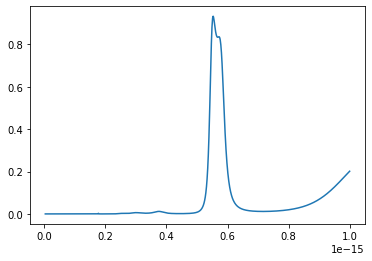

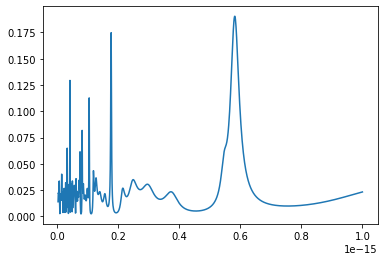

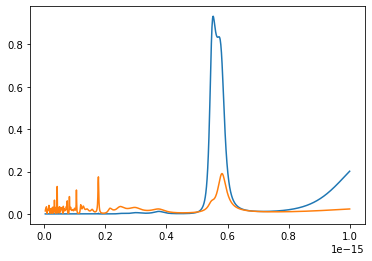

In [74]:
# plot

# -- transmission
plt.figure();
plt.plot(myData[:,0]*1e-9, myData[:,2]);

# -- absorbance
plt.figure();
plt.plot(myData[:,0]*1e-9, myData[:,3]);

# -- transmission and absorbance
plt.figure();
plt.plot(myData[:,0]*1e-9, myData[:,2]);
plt.plot(myData[:,0]*1e-9, myData[:,3]);